In [1]:
# Fix weird ROOT beahvior
import sys
sys.path.append("/usr/local/Cellar/root/6.12.04_1/lib/root/")
sys.path.append("/Library/Python/2.7/site-packages/")
# Regular imports
import ROOT as r
import numpy as np
from matplotlib import pyplot as pl
from root_numpy import hist2array as h2a

Welcome to JupyROOT 6.12/04


/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.1 is currently installed but you installed root_numpy against numpy 1.14.0. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
# Get Histogram from GS data 3.2/fb
f = r.TFile('/Users/jimenez/GS_data/GS_histograms_merged/physics_Main.root')
h = f.Get('NONE/h_2j_Minv')

In [3]:
# Simple plot function
def simplePlot(xb, yb, title):
    pl.figure(figsize=(9,9))
    pl.title(title)
    pl.plot(xb, yb, 'ko')
    pl.axis([1e3, 9e3, 0.1, 2e5])
    pl.yscale('log')
    pl.xscale('log')
    pl.show()

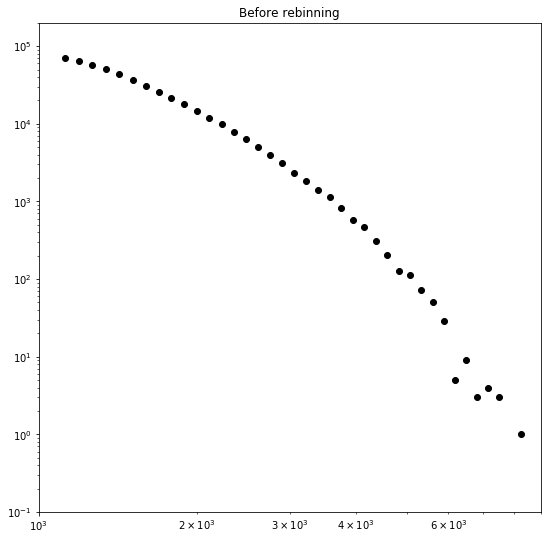

In [4]:
# Plot histogram as is
histo_in = h2a(h, return_edges=True)
simplePlot(histo_in[1][0][:-1], histo_in[0], 'Before rebinning')

In [5]:
# Function that rebins and plots
def rebinPlot(hist, min_x, max_x, n_bins, title):
    xbins = np.logspace(np.log10(min_x), np.log10(max_x), n_bins)
    h_rebin = h.Rebin(len(xbins)-1, 'rebinned', xbins)
    h_array = h2a(h_rebin, return_edges=True)
    simplePlot(h_array[1][0][:-1], h_array[0], title)

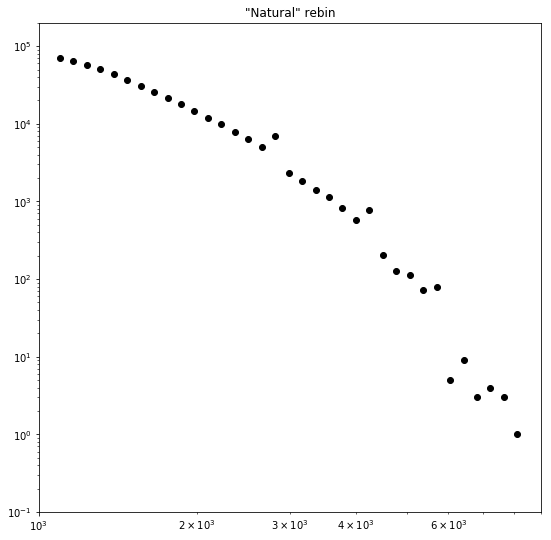

Warning in <TH1F::Rebin>: underflow entries will not be used when rebinning


In [6]:
# Get a "natural" way of rebinning: same min and max and nbins as original, but use log binning
# Maximum x bin extracted from the original histogram
max_original = h.GetBinLowEdge(h.GetNbinsX())+h.GetBinWidth(h.GetNbinsX())
rebinPlot(h, h.GetBinLowEdge(0), max_original, h.GetNbinsX(), '"Natural" rebin')

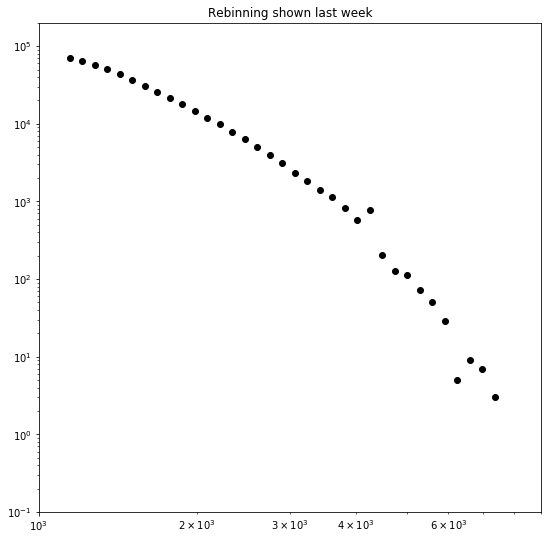

Warning in <TH1F::Rebin>: underflow entries will not be used when rebinning


In [7]:
rebinPlot(h, 700, 8200, 46, 'Rebinning shown last week')

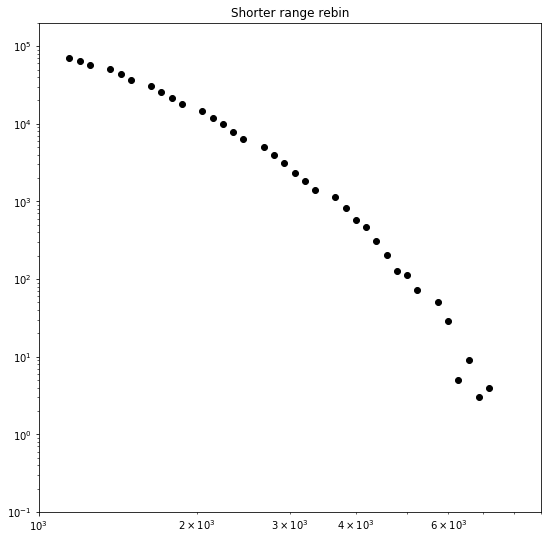

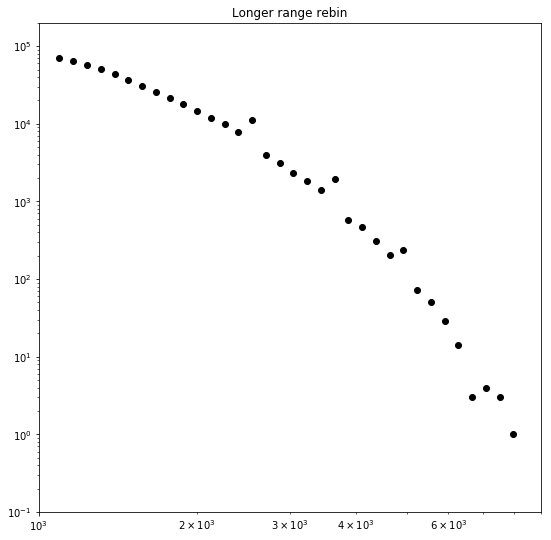

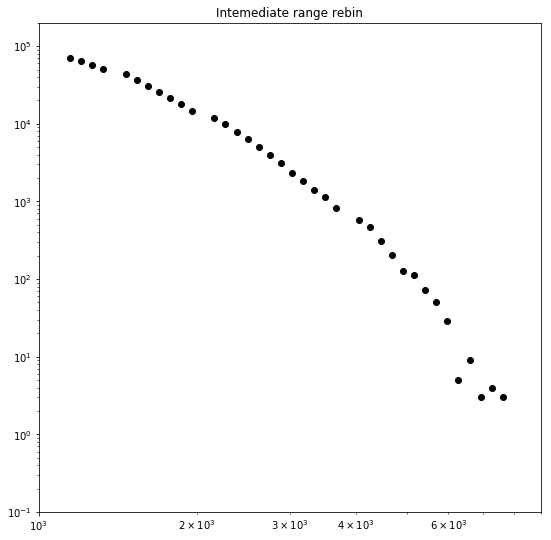

Warning in <TH1F::Rebin>: underflow entries will not be used when rebinning
Warning in <TH1F::Rebin>: underflow entries will not be used when rebinning
Warning in <TH1F::Rebin>: underflow entries will not be used when rebinning


In [8]:
# Some arbitraty binnings with the same number of bins as the original histograms
rebinPlot(h, 1000, 7500, 46, 'Shorter range rebin')
rebinPlot(h, 600,  9000, 46, 'Longer range rebin')
rebinPlot(h, 900,  8000, 46, 'Intemediate range rebin')

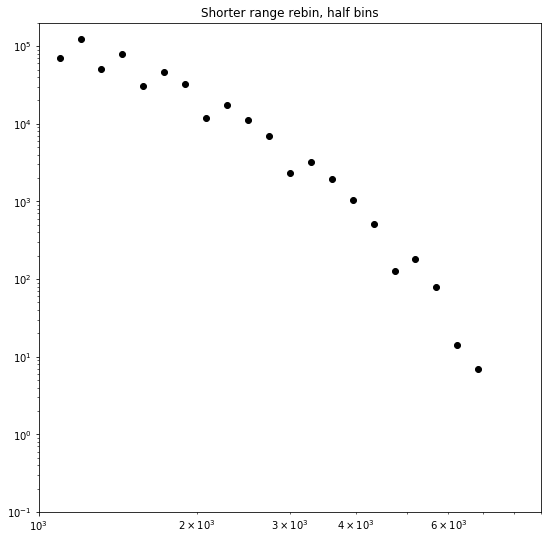

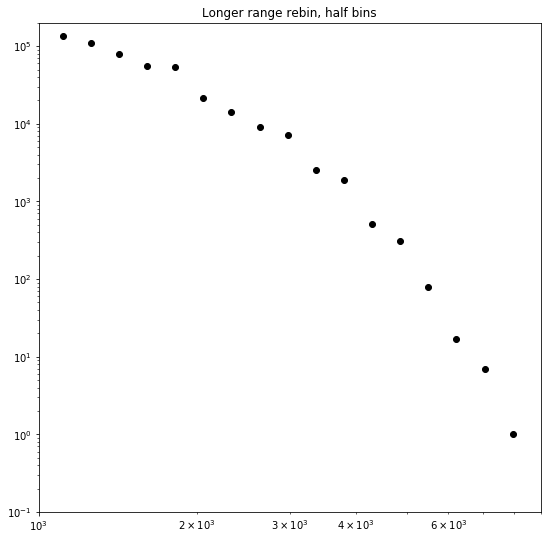

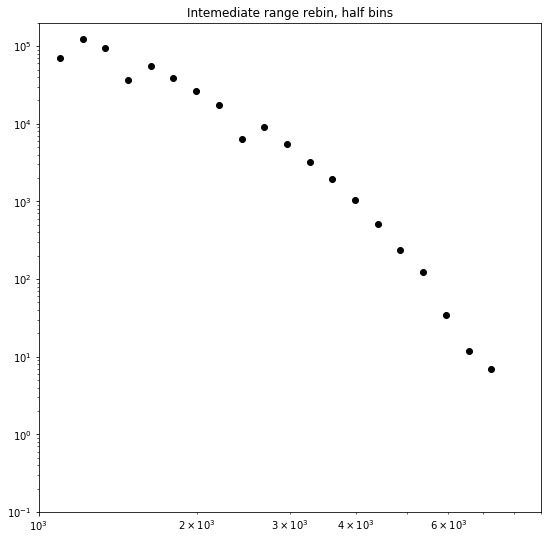

Warning in <TH1F::Rebin>: underflow entries will not be used when rebinning
Warning in <TH1F::Rebin>: underflow entries will not be used when rebinning
Warning in <TH1F::Rebin>: underflow entries will not be used when rebinning


In [9]:
# same as before, half number of bins
rebinPlot(h, 1000, 7500, 23, 'Shorter range rebin, half bins')
rebinPlot(h, 600,  9000, 23, 'Longer range rebin, half bins')
rebinPlot(h, 900,  8000, 23, 'Intemediate range rebin, half bins')